# Scaling Numeric Data

## Exercises

> - Utilize the scaling methods covered in the material
    * __Min-Max Scaling__
    ![min-max_scalar](images/min-max_scalar.png)
    * __Standard Scaler__
    ![standard_scalar](images/standard_scalar.png)
    * __Robust Scaler__
    ![robust_scalar](images/robust_scalar.png)
> - Apply the `.inverse_transform` method to the scaled data. Is the resulting dataset the exact same as the original? 
    * __As you can see below, the resulting data sets are not the same as the orginial data sets__
    
* __Min-Max Scaling Inverse__

|    |   bedroom |   bathroom |        sqft |   year |     tax_amt |   fips |
|---:|----------:|-----------:|------------:|-------:|------------:|-------:|
|  0 |        11 |        5.5 | 3.34568e+06 | 179820 | 6.64655e+07 | 454403 |
|  1 |        11 |       10   | 5.44779e+06 | 182641 | 5.69332e+07 | 452775 |
|  2 |         8 |        7   | 6.43923e+06 | 179638 | 3.59687e+07 | 452775 |
|  3 |        11 |        7   | 4.8175e+06  | 181549 | 5.35203e+07 | 458251 |
|  4 |        14 |        7   | 5.59089e+06 | 181094 | 1.11543e+07 | 454403 |
    
* __Standard Scaler Inverse__

|    |   bedroom |   bathroom |             sqft |    year |     tax_amt |   fips |
|---:|----------:|-----------:|-----------------:|--------:|------------:|-------:|
|  0 |   5.55142 |    3.10994 | 553707           | 38809.2 | 1.43578e+07 | 131250 |
|  1 |   5.55142 |    4.1598  | 900568           | 39393.5 | 1.22992e+07 | 130796 |
|  2 |   4.77423 |    3.45989 |      1.06416e+06 | 38771.5 | 7.77179e+06 | 130796 |
|  3 |   5.55142 |    3.45989 | 796566           | 39167.3 | 1.15622e+07 | 132325 |
|  4 |   6.32862 |    3.45989 | 924180           | 39073.1 | 2.41292e+06 | 131250 |
    
* __Robust Scaler Inverse__

|    |   bedroom |   bathroom |             sqft |   year |     tax_amt |   fips |
|---:|----------:|-----------:|-----------------:|-------:|------------:|-------:|
|  0 |         6 |       2.75 | 740012           |  44967 | 2.00561e+07 | 139335 |
|  1 |         6 |       3.5  |      1.204e+06   |  45649 | 1.71802e+07 | 138851 |
|  2 |         5 |       3    |      1.42283e+06 |  44923 | 1.08553e+07 | 138851 |
|  3 |         6 |       3    |      1.06488e+06 |  45385 | 1.61506e+07 | 140479 |
|  4 |         7 |       3    |      1.23558e+06 |  45275 | 3.36894e+06 | 139335 |
    
> - Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.
    * __Quantile Transformer Normal__
    ![quantile_transform_normal_image](images/quantile_transform_normal.png)
> - Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?
    * __Quantile Transformer__
    ![quantile_transform_image](images/quantile_transform_without_normal.png)
> - Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!
    

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import (MinMaxScaler, StandardScaler,
                                   RobustScaler, QuantileTransformer)
from sklearn.model_selection import train_test_split
import pandas as pd
from wrangle import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = wrangle_zillow()

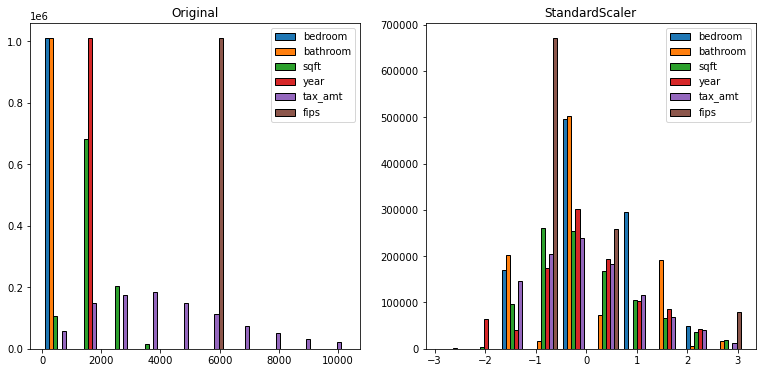

In [3]:
target='tax_val'
scaler = StandardScaler()
train, validate, test = train_validate_test_split(df, target)

# This is the final prepare.py function that further splits and scales the train, val, and test data.
x_train_scaled, y_train, x_validate_scaled, y_validate, x_test_scaled, y_test = scale_data(
    train, validate, test, scaler=scaler, target=target)

In [4]:
print('Train:', train.shape)
print('Validate:', validate.shape)
print('Test:', test.shape)

Train: (1009405, 7)
Validate: (432603, 7)
Test: (360503, 7)


### Scalers

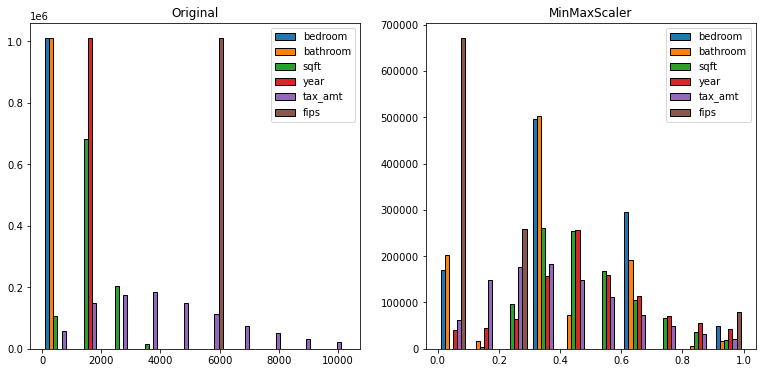

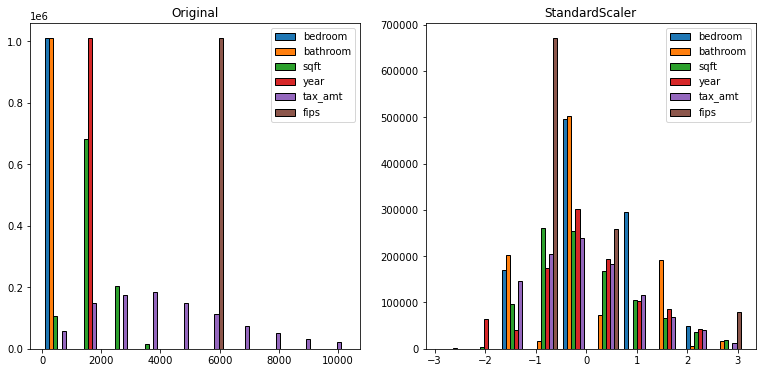

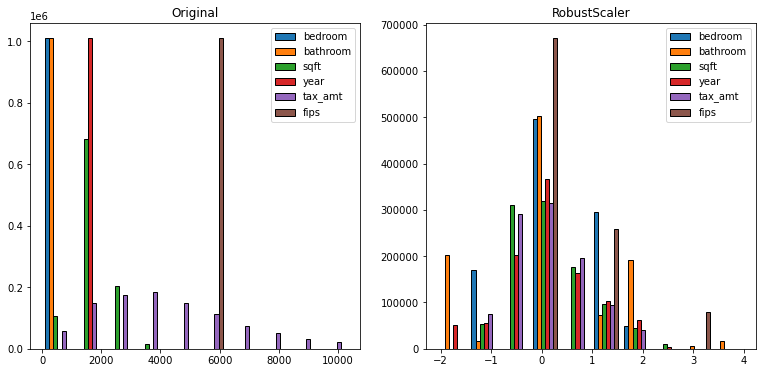

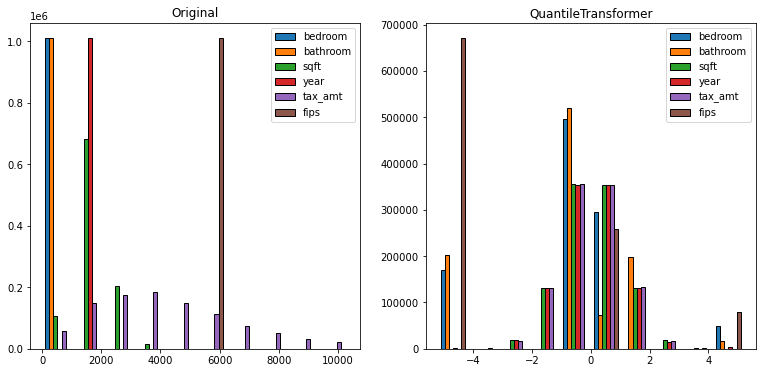

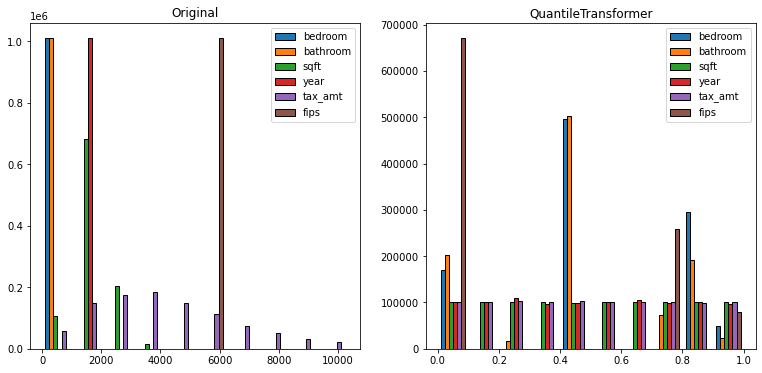

In [5]:
scalers = [MinMaxScaler(), StandardScaler(),  RobustScaler(),
           QuantileTransformer(output_distribution='normal'), QuantileTransformer()]
target = 'tax_val'


# run this for loop to get scalers and transformations visualizations
for scaler in scalers:
    scale_data(train, validate, test, scaler, target)

In [6]:
# # Use below to revert scalar to original dataset
# rename_index = {n:col_name for n, col_name in enumerate(x_cols)}
        
# for name, fit_scaler in fit_scalers.items():
#     inverse_df = pd.DataFrame(fit_scaler.inverse_transform(x_train))
#     inverse_df.rename(columns=rename_index, inplace=True)
    
#     print(inverse_df.head().to_markdown())